## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP TASK

### PREDICTION USING SUPERVISED MACHINE LEARNING MODEL

### SIMPLE LINEAR REGRESSION


OBJECTIVE:


1.To predict the percentage of marks that a student is expected to score based upon the number of hours they studied

2.To predict the score if a student studies for 9.25 hrs/ day

This dataset contains only one independent variable,So this is a simple linear regression task.

Importing the libraries

In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("http://bit.ly/w-data")

In [53]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [54]:
df.shape

(25, 2)

In [55]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [56]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking on Assumptions of Simple Linear Regression

In [57]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Scores'>

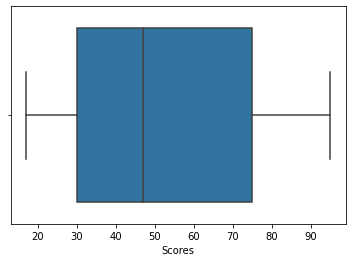

In [58]:
sns.boxplot(df['Scores'])

In [59]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

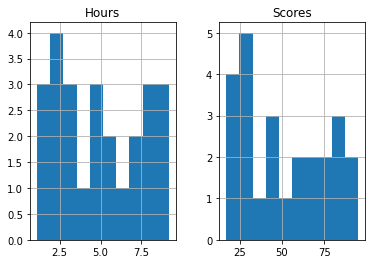

In [60]:
df.hist()

In [61]:
from scipy.stats import normaltest

In [62]:
normaltest(df['Scores'])

NormaltestResult(statistic=8.607498721813352, pvalue=0.013517780839813283)

### Relationship between the dependent and independent variable

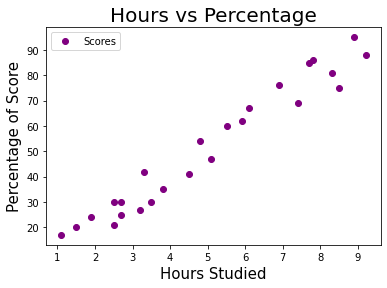

In [63]:
df.plot(x='Hours', y='Scores', style='o', color= 'purple')  
plt.title('Hours vs Percentage', Size='20')  
plt.xlabel('Hours Studied',Size='15') 
plt.ylabel('Percentage of Score',Size='15')
plt.show()

From above graph, There is a positive linear relation between the number of hours studied and percentage of score

### **Preparing the data**

Now, To create the dependent and independent variables from the data.

In [64]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Using Scikit-Learn's method to create training and testing data sets. 

In [65]:
from sklearn.model_selection import train_test_split  

In [66]:
train_x, test_x, train_y,test_y = train_test_split(x, y,test_size=0.3, random_state=0) 

### **Training the Algorithm**


In [67]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(train_x, train_y) 

LinearRegression()

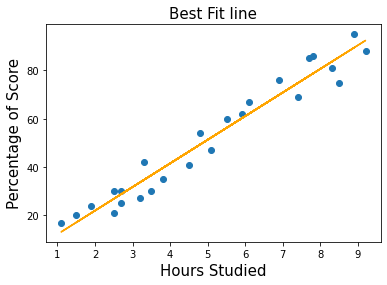

In [68]:
reg_line = (LR.coef_)*x + LR.intercept_
plt.scatter(x,y)
plt.plot(x, reg_line, color='Orange')
plt.title('Best Fit line', Size='15')  
plt.xlabel('Hours Studied',Size='15') 
plt.ylabel('Percentage of Score',Size='15')
plt.show()

### Predictions


In [69]:
pred_y = LR.predict(test_x) 

In [70]:
df = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y, 'Error' : test_y-pred_y})  
df 

,Actual,Predicted,Error
0,20,17.053665,2.946335
1,27,33.694229,-6.694229
2,69,74.806209,-5.806209
3,30,26.842232,3.157768
4,62,60.123359,1.876641
5,35,39.567369,-4.567369
6,24,20.969092,3.030908
7,86,78.721636,7.278364


### Evaluation of the model


In [71]:
print('Mean Absolute Error:', mean_absolute_error(test_y, pred_y)) 
print('Mean Square Error:', mean_squared_error(test_y, pred_y)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_y,pred_y)))
print('R2 Score:', r2_score(test_y, pred_y)) 

Mean Absolute Error: 4.419727808027652
Mean Square Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
R2 Score: 0.9568211104435257


Lower the Value of Mean Squared Error, Root Mean Squared Error and Mean Absolute Error Better is The performance of the Model. And R2 score near to 1 means model is good enough

### Predicting the Score

Final Objective

If a student studies for 9.25 hrs/day, What is the score??

In [72]:
hours = [[9.25]]
new_pred = LR.predict(hours)
print('score obtained = {}'.format((new_pred[0])))

score obtained = 92.91505723477056


Conclusion:Predicted Score for the student who studies for 9.25 hrs/day is 92.92